In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.metrics import mean_squared_error 

In [8]:
X_train = pd.read_csv('train_Int_MM_PCA15.csv')
X_train = X_train.drop('LoanApproved' , axis=1)
y_train = X_train['RiskScore']
X_train = X_train.drop('RiskScore' , axis=1)
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.412651,0.084086,0.282528,-0.393400,-0.096727,0.393623,-0.103533,0.098367,-0.313214,-0.013962,-0.074108,-0.287169,0.161454,0.360753,0.129990
1,-0.177765,0.031687,0.220899,0.010585,-0.042097,-0.534274,0.271388,0.394490,-0.065320,0.194361,-0.043839,-0.142310,0.154376,-0.110080,0.119097
2,0.075380,-0.140120,-0.233582,0.085041,-0.253663,-0.209136,-0.191891,0.494238,-0.013998,-0.162744,-0.048602,0.308490,-0.148155,-0.075608,0.089184
3,0.598926,-0.203006,0.054247,-0.085631,0.062238,0.238745,-0.549751,-0.151796,0.010523,0.218145,-0.083986,-0.005491,-0.102736,-0.411824,-0.049605
4,0.089788,-0.029256,0.082212,-0.036527,-0.274680,-0.538655,-0.136887,-0.148626,0.186360,-0.124184,-0.057235,0.116438,-0.106489,0.006368,0.109196


In [9]:
X_validation = pd.read_csv('valid_Int_MM_PCA15.csv')
X_validation = X_validation.drop('LoanApproved' , axis=1)
y_validation = X_validation['RiskScore']
X_validation = X_validation.drop('RiskScore' , axis=1)
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     4000 non-null   float64
 1   PC2     4000 non-null   float64
 2   PC3     4000 non-null   float64
 3   PC4     4000 non-null   float64
 4   PC5     4000 non-null   float64
 5   PC6     4000 non-null   float64
 6   PC7     4000 non-null   float64
 7   PC8     4000 non-null   float64
 8   PC9     4000 non-null   float64
 9   PC10    4000 non-null   float64
 10  PC11    4000 non-null   float64
 11  PC12    4000 non-null   float64
 12  PC13    4000 non-null   float64
 13  PC14    4000 non-null   float64
 14  PC15    4000 non-null   float64
dtypes: float64(15)
memory usage: 468.9 KB


In [10]:
X_test = pd.read_csv('test_Int_MM_PCA15.csv')
X_test = X_test.drop('LoanApproved' , axis=1)
y_test = X_test['RiskScore']
X_test = X_test.drop('RiskScore' , axis=1)

In [11]:
y_validation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: RiskScore
Non-Null Count  Dtype  
--------------  -----  
4000 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [15]:
class SingleLayer(nn.Module):
    def __init__(self,hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(15, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1)
        )
    def forward(self, x):
        return self.layers(x)

In [13]:
X_training = X_train.values
y_training = y_train.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_test.values
y_testing = y_test.values

In [16]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [17]:
print(X_training.shape)

(12000, 15)


Training Losses for hidden layer 8
          0
0  0.131239
1  0.127720
2  0.124260
3  0.120858
4  0.117516
 RMSE for validation set is : 0.08990560869201006
 RMSE for test set is : 0.08736104095864819
Training Losses for hidden layer 16
          0
0  0.064042
1  0.060202
2  0.056533
3  0.053040
4  0.049723
 RMSE for validation set is : 0.08925499504701101
 RMSE for test set is : 0.0869196316724261
Training Losses for hidden layer 32
          0
0  0.216081
1  0.200953
2  0.186444
3  0.172566
4  0.159326
 RMSE for validation set is : 0.08925272553553759
 RMSE for test set is : 0.08692375943385076
Training Losses for hidden layer 64
          0
0  0.105226
1  0.086229
2  0.069657
3  0.055535
4  0.043854
 RMSE for validation set is : 0.0892770662973149
 RMSE for test set is : 0.08695593907343104
Training Losses for hidden layer 128
          0
0  0.077854
1  0.050186
2  0.031565
3  0.021630
4  0.019164
 RMSE for validation set is : 0.08930580134594443
 RMSE for test set is : 0.0869825473

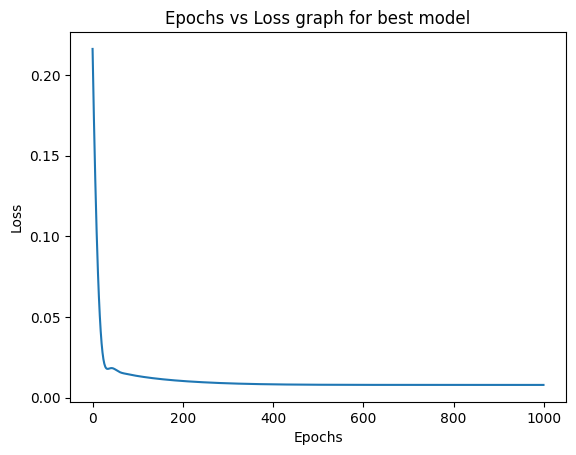

In [18]:
nuerons = [8,16,32,64,128]
min_err = 10000
again_loss = []
epochs = 1000
opt_degree = 0
for nueron in nuerons:
    model = SingleLayer(hidden1=nueron)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_arr = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        model.train()
        output = model(X_train)
        loss=criterion(y_train.float(), output)
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    print(f"Training Losses for hidden layer {nueron}")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val).detach().numpy()
    rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
    min_err = min(min_err,rmse)
    if rmse == min_err:
        again_loss = loss_arr
        opt_degree = nueron
    y_test_pred = model(X_test).detach().numpy()
    rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
    print(f" RMSE for validation set is : {rmse}")
    print(f" RMSE for test set is : {rmse_2}")
print(f"The Least Validation is {min_err} for Hidden Layer of Size {opt_degree}")
plt.plot(range(epochs), again_loss)
plt.title('Epochs vs Loss graph for best model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()  
    
 

In [19]:
class DoubleLayer(nn.Module):
    def __init__(self, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(15, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  0.294912
1  0.288141
2  0.281452
3  0.274846
4  0.268324
 RMSE for validation set is : 0.10096312143823627
 RMSE for test set is : 0.09768741587191648
Training Losses for hidden layer 16
          0
0  0.418623
1  0.404405
2  0.390473
3  0.376828
4  0.363475
 RMSE for validation set is : 0.10415806337432422
 RMSE for test set is : 0.10088341436071423
Training Losses for hidden layer 32
          0
0  0.707430
1  0.673392
2  0.640258
3  0.608042
4  0.576755
 RMSE for validation set is : 0.09455923166791441
 RMSE for test set is : 0.09158120793391283
Training Losses for hidden layer 64
          0
0  0.625456
1  0.567701
2  0.512937
3  0.461210
4  0.412554
 RMSE for validation set is : 0.09069898150670243
 RMSE for test set is : 0.08800897048073242
Training Losses for hidden layer 128
          0
0  0.257398
1  0.191937
2  0.137396
3  0.093806
4  0.060969
 RMSE for validation set is : 0.08910762831440745
 RMSE for test set is : 0.08677224

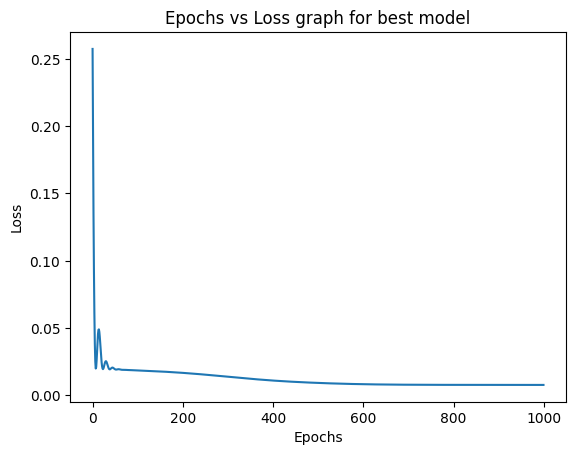

Training Losses for hidden layer 8
          0
0  0.043808
1  0.041288
2  0.038906
3  0.036664
4  0.034564
 RMSE for validation set is : 0.08916659274480702
 RMSE for test set is : 0.08684766301138035
Training Losses for hidden layer 16
          0
0  0.043885
1  0.040095
2  0.036638
3  0.033517
4  0.030736
 RMSE for validation set is : 0.08901912151484925
 RMSE for test set is : 0.08667753213056742
Training Losses for hidden layer 32
          0
0  0.130789
1  0.116152
2  0.102587
3  0.090109
4  0.078726
 RMSE for validation set is : 0.0890973432880675
 RMSE for test set is : 0.08674606685575312
Training Losses for hidden layer 64
          0
0  0.437256
1  0.382121
2  0.331015
3  0.283993
4  0.241093
 RMSE for validation set is : 0.08920716658119801
 RMSE for test set is : 0.08684107845033164
Training Losses for hidden layer 128
          0
0  0.192650
1  0.134547
2  0.088728
3  0.055138
4  0.033305
 RMSE for validation set is : 0.08902814980689694
 RMSE for test set is : 0.086714598

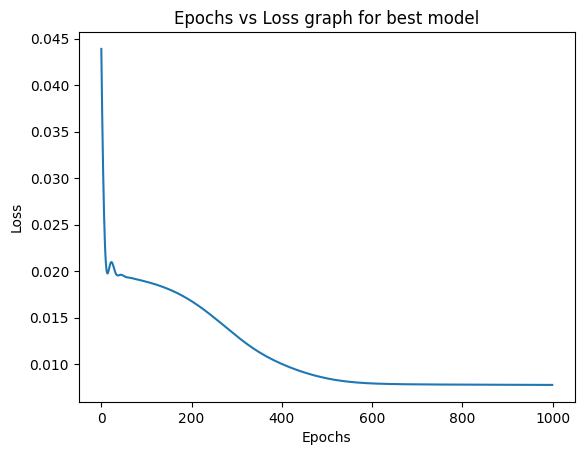

Training Losses for hidden layer 8
          0
0  0.025786
1  0.023869
2  0.022347
3  0.021218
4  0.020470
 RMSE for validation set is : 0.08882443479087845
 RMSE for test set is : 0.08647813935185818
Training Losses for hidden layer 16
          0
0  0.020003
1  0.019720
2  0.019847
3  0.019824
4  0.019704
 RMSE for validation set is : 0.08820594808420999
 RMSE for test set is : 0.08591571445026833
Training Losses for hidden layer 32
          0
0  0.033349
1  0.027262
2  0.023008
3  0.020544
4  0.019679
 RMSE for validation set is : 0.08878372800672586
 RMSE for test set is : 0.08649762448851954
Training Losses for hidden layer 64
          0
0  0.348675
1  0.295446
2  0.247098
3  0.203683
4  0.165221
 RMSE for validation set is : 0.08906803908607425
 RMSE for test set is : 0.0867210425469073
Training Losses for hidden layer 128
          0
0  0.312091
1  0.225020
2  0.153796
3  0.098478
4  0.058738
 RMSE for validation set is : 0.08911064356710786
 RMSE for test set is : 0.086799948

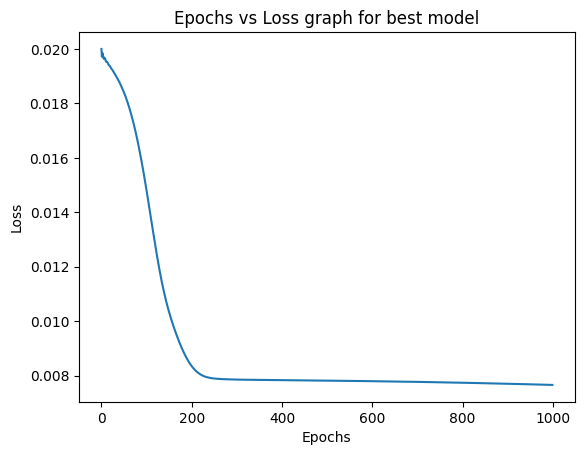

Training Losses for hidden layer 8
          0
0  0.088949
1  0.080920
2  0.073379
3  0.066341
4  0.059817
 RMSE for validation set is : 0.08894859504757456
 RMSE for test set is : 0.08660127311936941
Training Losses for hidden layer 16
          0
0  0.209802
1  0.188510
2  0.168601
3  0.150083
4  0.132959
 RMSE for validation set is : 0.0888366856471801
 RMSE for test set is : 0.08645315060200631
Training Losses for hidden layer 32
          0
0  0.086308
1  0.068406
2  0.053379
3  0.041257
4  0.032010
 RMSE for validation set is : 0.0889480139414682
 RMSE for test set is : 0.08664166970564777
Training Losses for hidden layer 64
          0
0  1.085230
1  0.953629
2  0.831269
3  0.718242
4  0.614583
 RMSE for validation set is : 0.08908397306949145
 RMSE for test set is : 0.08663211051442536
Training Losses for hidden layer 128
          0
0  0.519247
1  0.371524
2  0.250697
3  0.156697
4  0.088808
 RMSE for validation set is : 0.08905084726162416
 RMSE for test set is : 0.0867496311

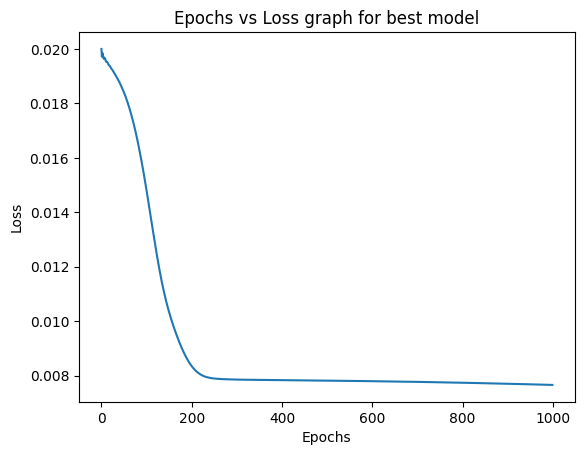

Training Losses for hidden layer 8
          0
0  0.538024
1  0.496965
2  0.457683
3  0.420266
4  0.384783
 RMSE for validation set is : 0.09031895207750795
 RMSE for test set is : 0.08732276895676597
Training Losses for hidden layer 16
          0
0  0.124746
1  0.104822
2  0.087001
3  0.071350
4  0.057906
 RMSE for validation set is : 0.08884267678587066
 RMSE for test set is : 0.0865074946007425
Training Losses for hidden layer 32
          0
0  1.023282
1  0.899283
2  0.784750
3  0.679728
4  0.584165
 RMSE for validation set is : 0.08911974618943391
 RMSE for test set is : 0.08647939936910906
Training Losses for hidden layer 64
          0
0  0.349865
1  0.243317
2  0.158334
3  0.094795
4  0.051878
 RMSE for validation set is : 0.08905048644873012
 RMSE for test set is : 0.08673245766272358
Training Losses for hidden layer 128
          0
0  0.782146
1  0.533143
2  0.335741
3  0.189225
4  0.091207
 RMSE for validation set is : 0.08908536349844864
 RMSE for test set is : 0.086769186

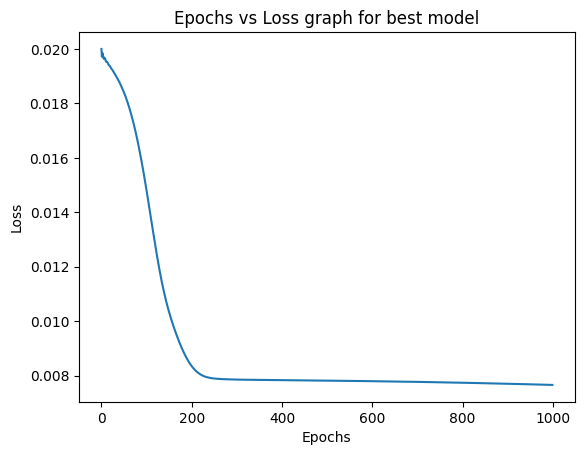

The Least Validation is 0.08820594808420999 for Hidden Layer of Size 32 & 16


In [20]:
nuerons = [8,16,32,64,128]
min_err = 10000
best_fn = 0
best_sn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for firstn in nuerons:
    for nueron in nuerons:
        model = DoubleLayer(hidden1=firstn, hidden2 = nueron)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        loss_arr = []
        for epoch in range(epochs):
            optimizer.zero_grad()
            model.train()
            output = model(X_train)
            loss=criterion(y_train.float(), output)
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
        print(f"Training Losses for hidden layer {nueron}")
        loss_df = pd.DataFrame(loss_arr)
        print(loss_df.head())
        y_val_pred=model(X_val).detach().numpy()
        rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
        min_err = min(min_err,rmse)
        if rmse == min_err:
            again_loss = loss_arr
            best_sn = nueron
            best_fn = firstn
        y_test_pred = model(X_test).detach().numpy()
        rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
        print(f" RMSE for validation set is : {rmse}")
        print(f" RMSE for test set is : {rmse_2}")
    plt.plot(range(epochs), again_loss)
    plt.title('Epochs vs Loss graph for best model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn}")
 

In [21]:
class TripleLayer(nn.Module):
    def __init__(self, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(15, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  0.103099
1  0.098924
2  0.094858
3  0.090901
4  0.087057
 RMSE for validation set is : 0.09496850155825816 for combination 8 & 8 & 8
 RMSE for test set is : 0.0921378246323002 for combination 8 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.294848
1  0.282945
2  0.271308
3  0.259942
4  0.248851
 RMSE for validation set is : 0.09853846692817372 for combination 8 & 8 & 16
 RMSE for test set is : 0.09548812675034432 for combination 8 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.028461
1  0.024871
2  0.022263
3  0.020617
4  0.019850
 RMSE for validation set is : 0.08871967522923746 for combination 8 & 8 & 32
 RMSE for test set is : 0.08633717612462886 for combination 8 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.381260
1  0.337916
2  0.297441
3  0.259874
4  0.225240
 RMSE for validation set is : 0.0939602332449967 for combination 8 & 8 & 64
 RMSE for test set is : 0.09115835058455236 for comb

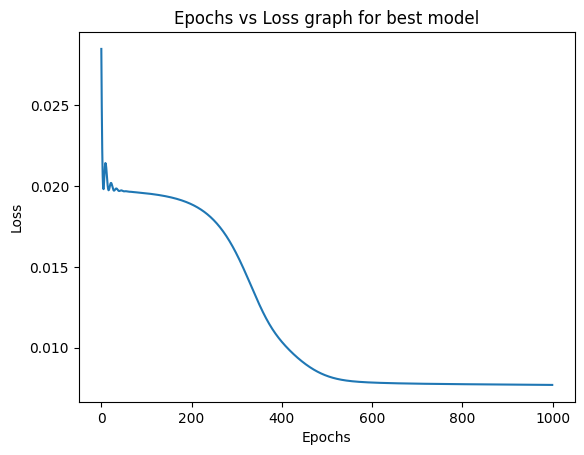

Training Losses for hidden layer 8
          0
0  1.411067
1  1.391260
2  1.371643
3  1.352217
4  1.332984
 RMSE for validation set is : 0.13143153153797993 for combination 8 & 16 & 8
 RMSE for test set is : 0.12865573208546904 for combination 8 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.433170
1  0.414654
2  0.396603
3  0.379023
4  0.361920
 RMSE for validation set is : 0.11392374188268607 for combination 8 & 16 & 16
 RMSE for test set is : 0.11079099814026898 for combination 8 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.390853
1  0.364336
2  0.338839
3  0.314374
4  0.290954
 RMSE for validation set is : 0.09429879790228354 for combination 8 & 16 & 32
 RMSE for test set is : 0.09152189116691925 for combination 8 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.537200
1  0.477885
2  0.422298
3  0.370488
4  0.322495
 RMSE for validation set is : 0.09065761143826837 for combination 8 & 16 & 64
 RMSE for test set is : 0.08815550890252355

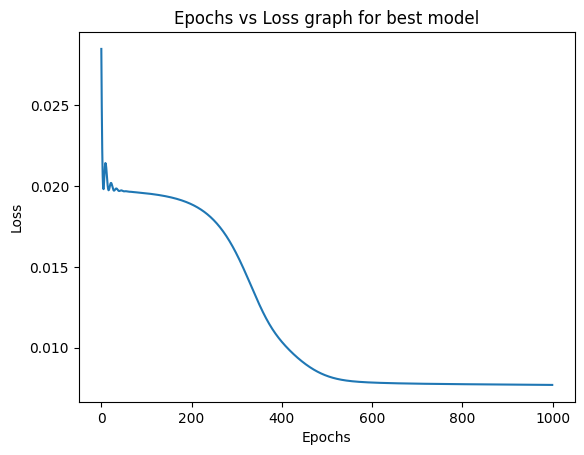

Training Losses for hidden layer 8
          0
0  0.785838
1  0.766208
2  0.746911
3  0.727950
4  0.709327
 RMSE for validation set is : 0.12867767124056648 for combination 8 & 32 & 8
 RMSE for test set is : 0.12583829995747312 for combination 8 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.029314
1  0.026186
2  0.023711
3  0.021879
4  0.020660
 RMSE for validation set is : 0.08849657771260873 for combination 8 & 32 & 16
 RMSE for test set is : 0.08613796045744646 for combination 8 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.019940
1  0.020247
2  0.019917
3  0.019862
4  0.020020
 RMSE for validation set is : 0.08795821981435528 for combination 8 & 32 & 32
 RMSE for test set is : 0.08567721331604873 for combination 8 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.347941
1  0.290962
2  0.239666
3  0.194095
4  0.154249
 RMSE for validation set is : 0.08950368647501988 for combination 8 & 32 & 64
 RMSE for test set is : 0.08709637401622596

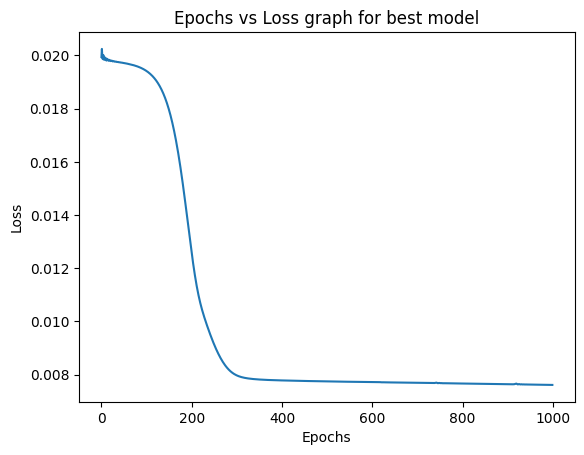

Training Losses for hidden layer 8
          0
0  0.043919
1  0.039394
2  0.035353
3  0.031803
4  0.028748
 RMSE for validation set is : 0.08900733000260323 for combination 8 & 64 & 8
 RMSE for test set is : 0.08665874301651344 for combination 8 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.382691
1  0.352408
2  0.323640
3  0.296392
4  0.270661
 RMSE for validation set is : 0.09224860663447199 for combination 8 & 64 & 16
 RMSE for test set is : 0.08948397645783301 for combination 8 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.045124
1  0.033957
2  0.026109
3  0.021505
4  0.019811
 RMSE for validation set is : 0.08859338605560416 for combination 8 & 64 & 32
 RMSE for test set is : 0.0862286199196536 for combination 8 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.095762
1  0.064669
2  0.041981
3  0.027556
4  0.020747
 RMSE for validation set is : 0.0887156913907976 for combination 8 & 64 & 64
 RMSE for test set is : 0.08636275919323769 f

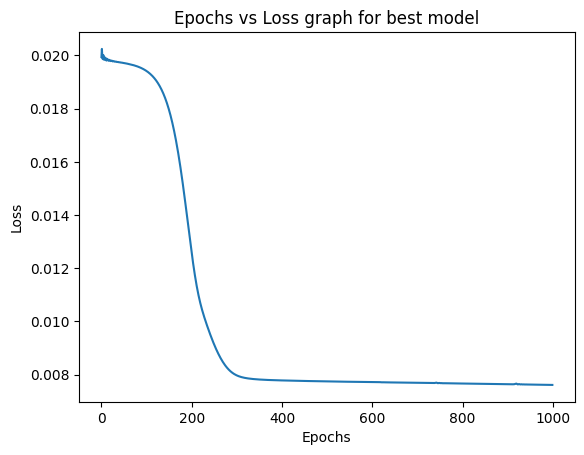

Training Losses for hidden layer 8
          0
0  0.314359
1  0.306118
2  0.297995
3  0.289992
4  0.282111
 RMSE for validation set is : 0.10969455053758845 for combination 16 & 8 & 8
 RMSE for test set is : 0.10644164210299724 for combination 16 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.470681
1  0.454079
2  0.437785
3  0.421803
4  0.406140
 RMSE for validation set is : 0.10367782947944174 for combination 16 & 8 & 16
 RMSE for test set is : 0.10043132342946516 for combination 16 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.226792
1  0.208195
2  0.190483
3  0.173673
4  0.157779
 RMSE for validation set is : 0.0903375520823339 for combination 16 & 8 & 32
 RMSE for test set is : 0.08795100363407596 for combination 16 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.538190
1  0.484234
2  0.433351
3  0.385584
4  0.340962
 RMSE for validation set is : 0.09075268411706262 for combination 16 & 8 & 64
 RMSE for test set is : 0.08833085381887935 

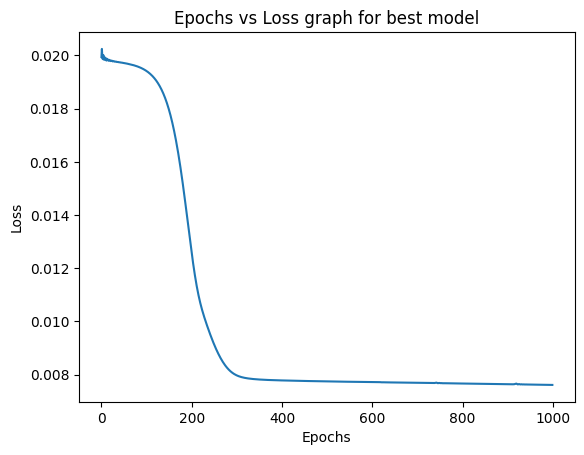

Training Losses for hidden layer 8
          0
0  0.435208
1  0.424543
2  0.414034
3  0.403684
4  0.393494
 RMSE for validation set is : 0.11383279997651569 for combination 16 & 16 & 8
 RMSE for test set is : 0.11056876959849872 for combination 16 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.520633
1  0.503388
2  0.486478
3  0.469908
4  0.453680
 RMSE for validation set is : 0.09771347753289082 for combination 16 & 16 & 16
 RMSE for test set is : 0.09493873371913576 for combination 16 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.019912
1  0.019985
2  0.019885
3  0.019801
4  0.019872
 RMSE for validation set is : 0.08842832542992846 for combination 16 & 16 & 32
 RMSE for test set is : 0.08605563919071006 for combination 16 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.695580
1  0.627402
2  0.563029
3  0.502500
4  0.445840
 RMSE for validation set is : 0.09041803235441415 for combination 16 & 16 & 64
 RMSE for test set is : 0.0880365908

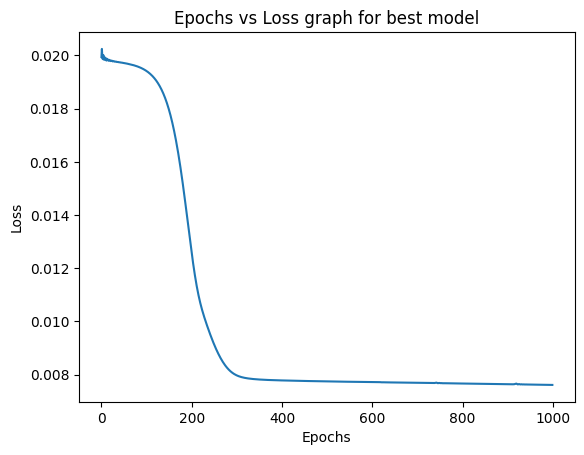

Training Losses for hidden layer 8
          0
0  0.514862
1  0.496920
2  0.479381
3  0.462250
4  0.445529
 RMSE for validation set is : 0.11870090448497689 for combination 16 & 32 & 8
 RMSE for test set is : 0.11552124362037981 for combination 16 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.417011
1  0.395229
2  0.374138
3  0.353742
4  0.334040
 RMSE for validation set is : 0.09162952000520205 for combination 16 & 32 & 16
 RMSE for test set is : 0.08897944580740087 for combination 16 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.239483
1  0.212149
2  0.186683
3  0.163115
4  0.141461
 RMSE for validation set is : 0.08949933170489992 for combination 16 & 32 & 32
 RMSE for test set is : 0.0871052407451143 for combination 16 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.639647
1  0.564967
2  0.495318
3  0.430742
4  0.371261
 RMSE for validation set is : 0.08984547592661439 for combination 16 & 32 & 64
 RMSE for test set is : 0.08744248209

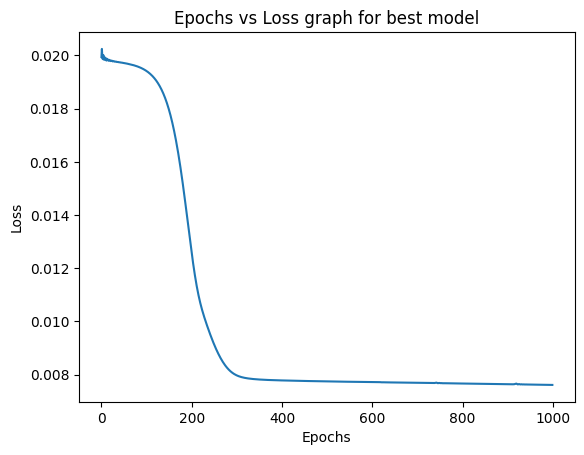

Training Losses for hidden layer 8
          0
0  0.028433
1  0.025266
2  0.022847
3  0.021166
4  0.020176
 RMSE for validation set is : 0.08832461707681762 for combination 16 & 64 & 8
 RMSE for test set is : 0.08598169631657078 for combination 16 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.426205
1  0.393103
2  0.361412
3  0.331168
4  0.302399
 RMSE for validation set is : 0.09025504981816636 for combination 16 & 64 & 16
 RMSE for test set is : 0.08775292842378786 for combination 16 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.141747
1  0.116575
2  0.094414
3  0.075295
4  0.059212
 RMSE for validation set is : 0.08886238755897688 for combination 16 & 64 & 32
 RMSE for test set is : 0.08650819706648312 for combination 16 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.570109
1  0.470108
2  0.380851
3  0.302317
4  0.234405
 RMSE for validation set is : 0.08927468259388302 for combination 16 & 64 & 64
 RMSE for test set is : 0.0868684831

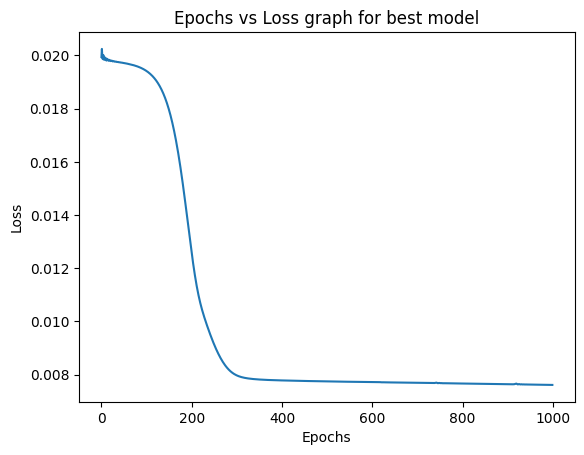

Training Losses for hidden layer 8
          0
0  0.046791
1  0.044254
2  0.041841
3  0.039554
4  0.037397
 RMSE for validation set is : 0.08951822165286871 for combination 32 & 8 & 8
 RMSE for test set is : 0.08718264528229751 for combination 32 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.811592
1  0.789809
2  0.768366
3  0.747266
4  0.726510
 RMSE for validation set is : 0.11243576610149601 for combination 32 & 8 & 16
 RMSE for test set is : 0.1091614793324277 for combination 32 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.526859
1  0.497952
2  0.469985
3  0.442967
4  0.416903
 RMSE for validation set is : 0.09231394364177965 for combination 32 & 8 & 32
 RMSE for test set is : 0.08982251787161655 for combination 32 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.441124
1  0.393166
2  0.348255
3  0.306423
4  0.267686
 RMSE for validation set is : 0.0902075812370467 for combination 32 & 8 & 64
 RMSE for test set is : 0.08782412874529129 f

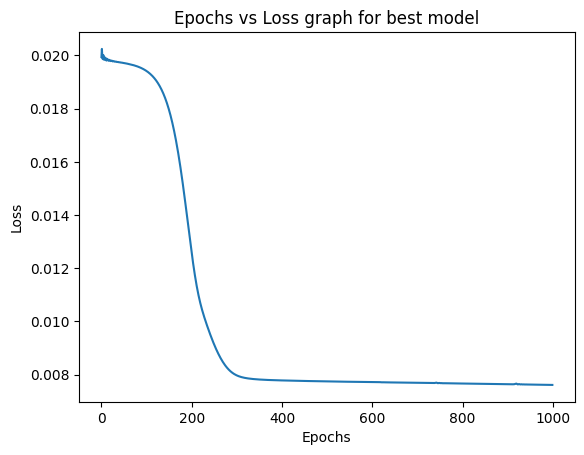

Training Losses for hidden layer 8
          0
0  0.178338
1  0.171964
2  0.165732
3  0.159645
4  0.153704
 RMSE for validation set is : 0.09438808670160928 for combination 32 & 16 & 8
 RMSE for test set is : 0.09138945196947561 for combination 32 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.970780
1  0.939866
2  0.909551
3  0.879841
4  0.850739
 RMSE for validation set is : 0.10340563760929453 for combination 32 & 16 & 16
 RMSE for test set is : 0.09993280932539787 for combination 32 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.169842
1  0.151767
2  0.134880
3  0.119196
4  0.104728
 RMSE for validation set is : 0.08921676042279138 for combination 32 & 16 & 32
 RMSE for test set is : 0.0868317610868469 for combination 32 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.210714
1  0.175034
2  0.143184
3  0.115199
4  0.091076
 RMSE for validation set is : 0.08908791953115593 for combination 32 & 16 & 64
 RMSE for test set is : 0.08671626611

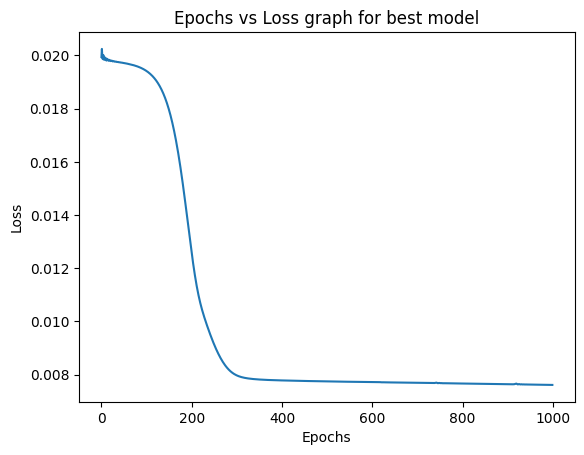

Training Losses for hidden layer 8
          0
0  0.224019
1  0.211333
2  0.199066
3  0.187227
4  0.175821
 RMSE for validation set is : 0.09012019087503816 for combination 32 & 32 & 8
 RMSE for test set is : 0.08766721570601267 for combination 32 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.269131
1  0.249855
2  0.231438
3  0.213886
4  0.197194
 RMSE for validation set is : 0.08994237006682684 for combination 32 & 32 & 16
 RMSE for test set is : 0.08746257230569086 for combination 32 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.211928
1  0.184558
2  0.159346
3  0.136326
4  0.115518
 RMSE for validation set is : 0.08910216715505923 for combination 32 & 32 & 32
 RMSE for test set is : 0.0867231903786545 for combination 32 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.102321
1  0.076026
2  0.054946
3  0.039056
4  0.028192
 RMSE for validation set is : 0.08874912593975286 for combination 32 & 32 & 64
 RMSE for test set is : 0.08636943413

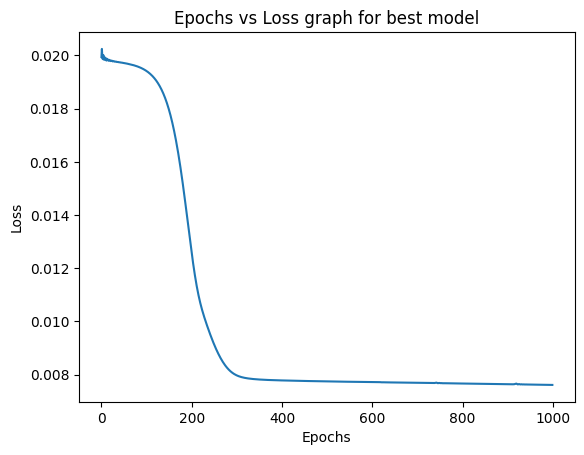

Training Losses for hidden layer 8
          0
0  0.051197
1  0.046517
2  0.042218
3  0.038307
4  0.034792
 RMSE for validation set is : 0.08882502194791383 for combination 32 & 64 & 8
 RMSE for test set is : 0.08649980478474882 for combination 32 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.357977
1  0.324013
2  0.291876
3  0.261606
4  0.233235
 RMSE for validation set is : 0.08933862412736761 for combination 32 & 64 & 16
 RMSE for test set is : 0.08694497105358905 for combination 32 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.352762
1  0.303566
2  0.258373
3  0.217258
4  0.180260
 RMSE for validation set is : 0.08913280280560623 for combination 32 & 64 & 32
 RMSE for test set is : 0.08676719579574854 for combination 32 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.471576
1  0.389791
2  0.316631
3  0.252126
4  0.196226
 RMSE for validation set is : 0.0891416263022591 for combination 32 & 64 & 64
 RMSE for test set is : 0.08677360887

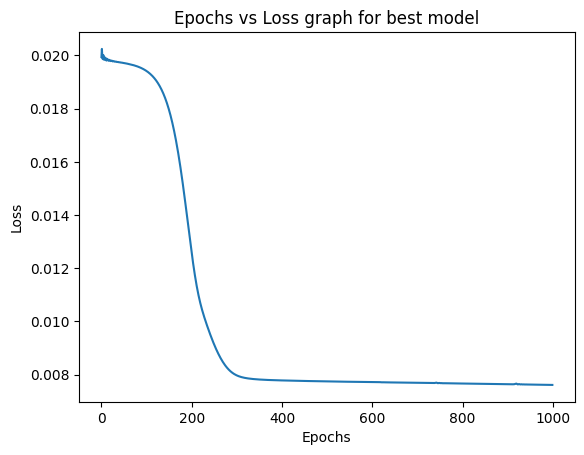

Training Losses for hidden layer 8
          0
0  0.232648
1  0.225163
2  0.217830
3  0.210651
4  0.203629
 RMSE for validation set is : 0.09430984388925226 for combination 64 & 8 & 8
 RMSE for test set is : 0.09150555730284854 for combination 64 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.107792
1  0.100096
2  0.092776
3  0.085838
4  0.079283
 RMSE for validation set is : 0.08961926278501617 for combination 64 & 8 & 16
 RMSE for test set is : 0.08728855067131819 for combination 64 & 8 & 16
Training Losses for hidden layer 32
          0
0  1.148641
1  1.103263
2  1.058920
3  1.015628
4  0.973394
 RMSE for validation set is : 0.09633133001170124 for combination 64 & 8 & 32
 RMSE for test set is : 0.09326219808245603 for combination 64 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.061988
1  0.047973
2  0.036860
3  0.028651
4  0.023258
 RMSE for validation set is : 0.08689736623805928 for combination 64 & 8 & 64
 RMSE for test set is : 0.08468395058119318

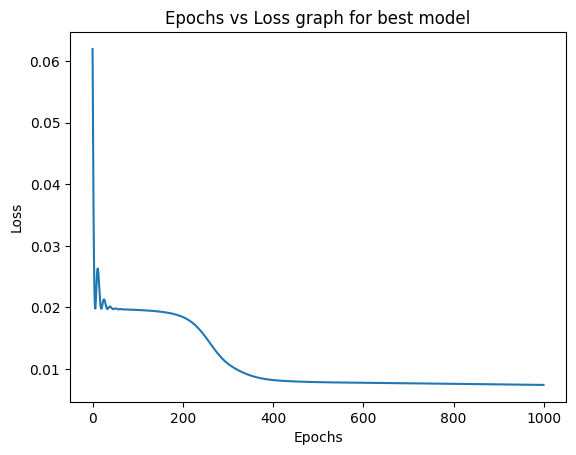

Training Losses for hidden layer 8
          0
0  0.030662
1  0.028751
2  0.027026
3  0.025492
4  0.024151
 RMSE for validation set is : 0.0878742388179188 for combination 64 & 16 & 8
 RMSE for test set is : 0.0856178608627775 for combination 64 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.234418
1  0.221262
2  0.208533
3  0.196236
4  0.184374
 RMSE for validation set is : 0.09022956397702288 for combination 64 & 16 & 16
 RMSE for test set is : 0.08786331123216203 for combination 64 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.855847
1  0.809884
2  0.765278
3  0.722036
4  0.680162
 RMSE for validation set is : 0.09111314652934853 for combination 64 & 16 & 32
 RMSE for test set is : 0.08844571196775292 for combination 64 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.810167
1  0.735803
2  0.665383
3  0.598939
4  0.536484
 RMSE for validation set is : 0.08988869620855959 for combination 64 & 16 & 64
 RMSE for test set is : 0.087518119851

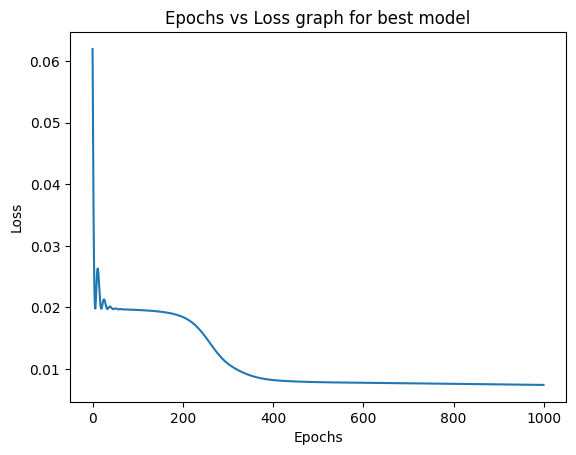

Training Losses for hidden layer 8
          0
0  0.869717
1  0.842868
2  0.816574
3  0.790846
4  0.765694
 RMSE for validation set is : 0.11340190775702941 for combination 64 & 32 & 8
 RMSE for test set is : 0.10975451277419207 for combination 64 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.218663
1  0.202314
2  0.186670
3  0.171747
4  0.157558
 RMSE for validation set is : 0.08942538793390116 for combination 64 & 32 & 16
 RMSE for test set is : 0.0870215415761762 for combination 64 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.118574
1  0.099292
2  0.082177
3  0.067253
4  0.054519
 RMSE for validation set is : 0.08876004939538093 for combination 64 & 32 & 32
 RMSE for test set is : 0.086405600869567 for combination 64 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.020033
1  0.021403
2  0.020002
3  0.019964
4  0.020552
 RMSE for validation set is : 0.08710631260385512 for combination 64 & 32 & 64
 RMSE for test set is : 0.0850160546033

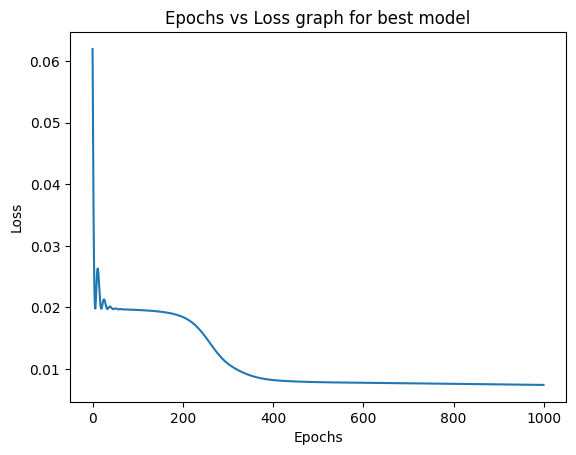

Training Losses for hidden layer 8
          0
0  0.178978
1  0.164966
2  0.151692
3  0.139157
4  0.127359
 RMSE for validation set is : 0.08991554232155277 for combination 64 & 64 & 8
 RMSE for test set is : 0.08737524774042843 for combination 64 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.019987
1  0.020043
2  0.019931
3  0.019751
4  0.019848
 RMSE for validation set is : 0.08843883568998556 for combination 64 & 64 & 16
 RMSE for test set is : 0.08608325064309098 for combination 64 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.087464
1  0.065051
2  0.047364
3  0.034326
4  0.025708
 RMSE for validation set is : 0.088346593967057 for combination 64 & 64 & 32
 RMSE for test set is : 0.08602537733916493 for combination 64 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.034547
1  0.022243
2  0.019972
3  0.023320
4  0.025441
 RMSE for validation set is : 0.08760053125977273 for combination 64 & 64 & 64
 RMSE for test set is : 0.085356981358

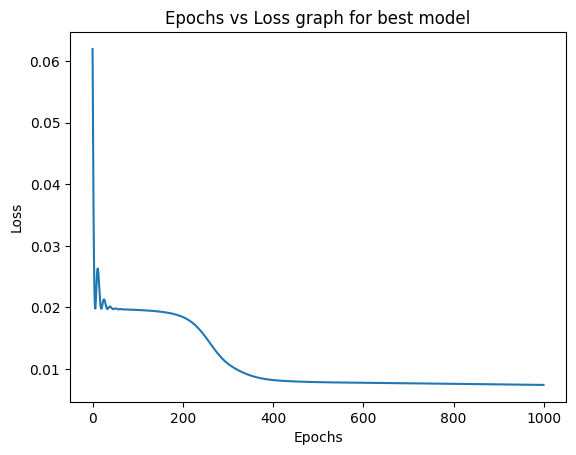

The Least Validation is 0.08689736623805928 for Hidden Layer of Size 64 & 8 & 64


In [22]:
nuerons = [8,16,32,64]
min_err = 10000
best_fn = 0
best_sn = 0
best_tn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for nueronF in nuerons:
    for firstn in nuerons:
        for nueron in nuerons:
            model = TripleLayer(hidden1=nueronF,hidden2=firstn, hidden3 = nueron)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            loss_arr = []
            for epoch in range(epochs):
                optimizer.zero_grad()
                model.train()
                output = model(X_train)
                loss=criterion(y_train.float(), output)
                loss_arr.append(loss.detach().numpy())
                loss.backward()
                optimizer.step()
            print(f"Training Losses for hidden layer {nueron}")
            loss_df = pd.DataFrame(loss_arr)
            print(loss_df.head())
            y_val_pred=model(X_val).detach().numpy()
            rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
            min_err = min(min_err,rmse)
            if rmse == min_err:
                again_loss = loss_arr
                best_sn = firstn
                best_fn = nueronF
                best_tn = nueron
            y_test_pred = model(X_test).detach().numpy()
            rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
            print(f" RMSE for validation set is : {rmse} for combination {nueronF} & {firstn} & {nueron}")
            print(f" RMSE for test set is : {rmse_2} for combination {nueronF} & {firstn} & {nueron}")
        plt.plot(range(epochs), again_loss)
        plt.title('Epochs vs Loss graph for best model')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn} & {best_tn}")
 

In [24]:
model = SingleLayer(hidden1=32)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


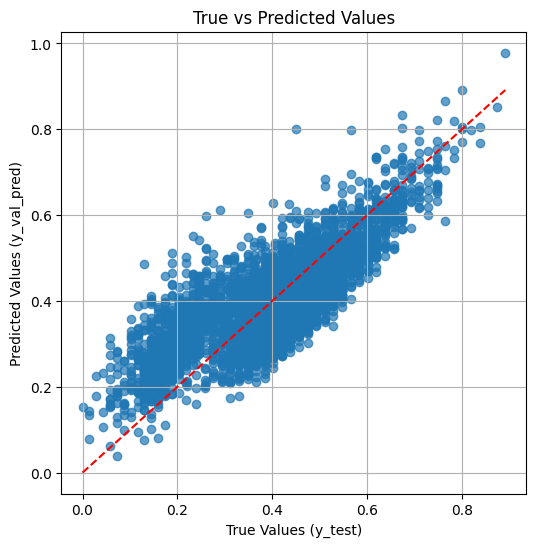

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [26]:
model = DoubleLayer(hidden1=32,hidden2 = 16)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


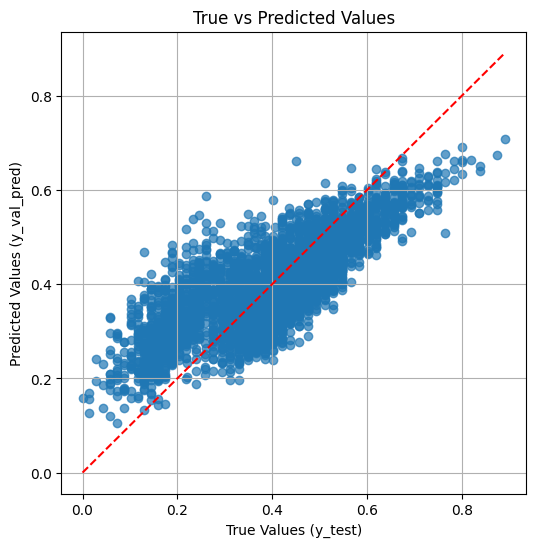

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [28]:
model = TripleLayer(hidden1=64,hidden2 = 8, hidden3=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


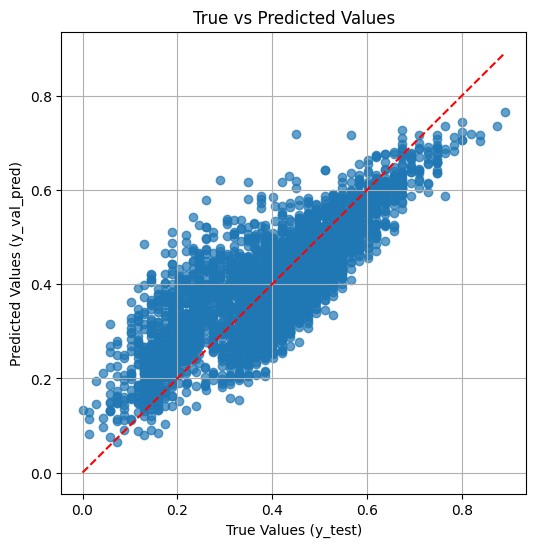

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()